<a href="https://colab.research.google.com/github/KonuTech/Time-Series-Analysis-Forecasting-and-Machine-Learning/blob/main/ETS_Champagne.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.metrics import r2_score

In [2]:
!pip install -U statsmodels

Requirement already up-to-date: statsmodels in /usr/local/lib/python3.7/dist-packages (0.12.2)


In [3]:
!wget -nc https://lazyprogrammer.me/course_files/timeseries/perrin-freres-monthly-champagne.csv

File ‘perrin-freres-monthly-champagne.csv’ already there; not retrieving.



In [4]:
df = pd.read_csv(
    'perrin-freres-monthly-champagne.csv',
    index_col='Month',
    skipfooter=2,
    parse_dates=True
)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  """


In [5]:
df.head()

,Perrin Freres monthly champagne sales millions ?64-?72
Month,
1964-01-01,2815
1964-02-01,2672
1964-03-01,2755
1964-04-01,2721
1964-05-01,2946


In [6]:
df.columns = ['Sales']

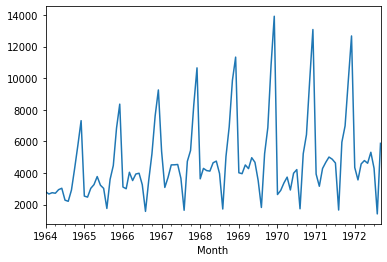

In [7]:
df['Sales'].plot()

In [8]:
df.index.freq = 'MS'

In [20]:
Ntest = 12
train = df.iloc[:-Ntest]
test = df.iloc[-Ntest:]

In [22]:
# boolean series to index df rows
train_idx = df.index <= train.index[-1]
test_idx = df.index > train.index[-1]

In [23]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [26]:
hw = ExponentialSmoothing(
    train['Sales'],
    initialization_method='legacy-heuristic',
    trend='add',
    seasonal='add',
    seasonal_periods=12
)
res_hw = hw.fit()

In [27]:
df.loc[train_idx, 'HoltWintersTrain'] = res_hw.fittedvalues

In [28]:
df.loc[test_idx, 'HoltWintersTest'] = res_hw.forecast(Ntest)

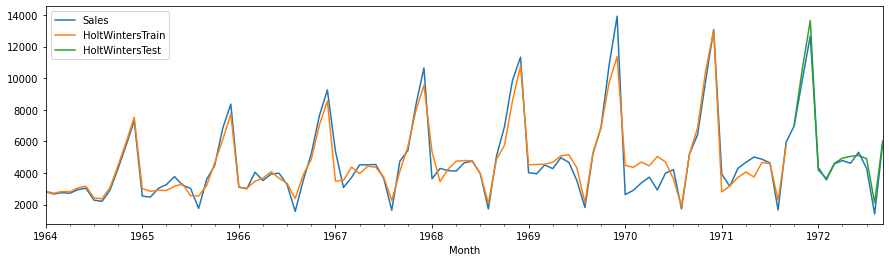

In [30]:
df[['Sales', 'HoltWintersTrain', 'HoltWintersTest']].plot(figsize=(15, 4))

In [31]:
r2_score(train['Sales'], res_hw.fittedvalues)

0.9173433323379416

In [32]:
r2_score(test['Sales'], res_hw.forecast(Ntest))

0.9735808870459498